In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow.keras as keras

In [3]:
# load the data
(trainX,trainy),(testX,testy) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


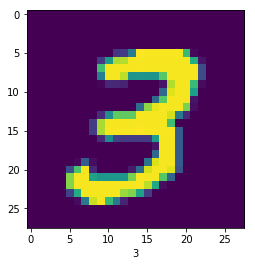

In [6]:
# normalize the data and examine
trainX = trainX/255.0
testX = testX/255.0
print(trainX.shape,trainy.shape,testX.shape,testy.shape)
plt.imshow(trainX[7])
plt.xlabel(trainy[7])
plt.show()

In [35]:
def build_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(140,activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(10,activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    return model

In [36]:
model = build_model()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 140)               109900    
_________________________________________________________________
dropout_5 (Dropout)          (None, 140)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1410      
Total params: 111,310
Trainable params: 111,310
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(trainX,trainy,validation_data=(testX,testy),
                    shuffle=True,epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 71us/sample - loss: 1.1805 - accuracy: 0.7105 - val_loss: 0.5819 - val_accuracy: 0.8588
Epoch 2/15
60000/60000 [==============================] - 4s 64us/sample - loss: 0.4986 - accuracy: 0.8658 - val_loss: 0.3968 - val_accuracy: 0.8966
Epoch 3/15
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3917 - accuracy: 0.8895 - val_loss: 0.3348 - val_accuracy: 0.9070
Epoch 4/15
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3484 - accuracy: 0.9003 - val_loss: 0.3060 - val_accuracy: 0.9144
Epoch 5/15
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3209 - accuracy: 0.9069 - val_loss: 0.2866 - val_accuracy: 0.9174
Epoch 6/15
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2996 - accuracy: 0.9125 - val_loss: 0.2713 - val_accuracy: 0.9209
Epoch 7/15
60000/60000 [==============================] 

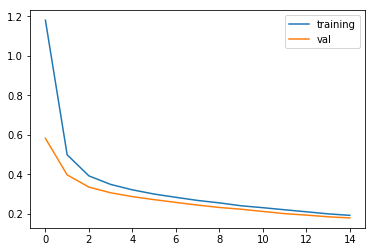

In [38]:
plt.plot(history.history['loss'],label='training')
plt.plot(history.history['val_loss'],label='val')
plt.legend()
plt.show()